<a href="https://colab.research.google.com/github/SaraMKorayem/Machine-Learning/blob/main/MLSaraMK_Lec_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sara Mohamed Korayem

# ID: 211001535

# **Machine learning model to predict stroke**

Dataset from the following link on Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# **Step #1: Aquire Data**

In [2]:
#modules:
import pandas as pd #dataframe
import numpy as np #numerical activity, it is a fundamental package for numerical computing in Python
import matplotlib.pyplot as plt #for visualisation
import scipy as sc #stat
import sklearn as sk
import seaborn as sns #graphs

In [3]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info() #gives me a list of all of the columns in the dataset, what they contain as info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().transpose() #why do this? Bc I want to see min, max, median, ...etc. why? tbh idk

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# **Step #2: Filtering**

In [9]:
df = df.drop(['id'], axis =1) #because I do not need the id column furtherly

In [10]:
df.shape

(5110, 11)

In [11]:
df.isnull() #look for missing values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Detecting Missing Values

Matrix Visualization:


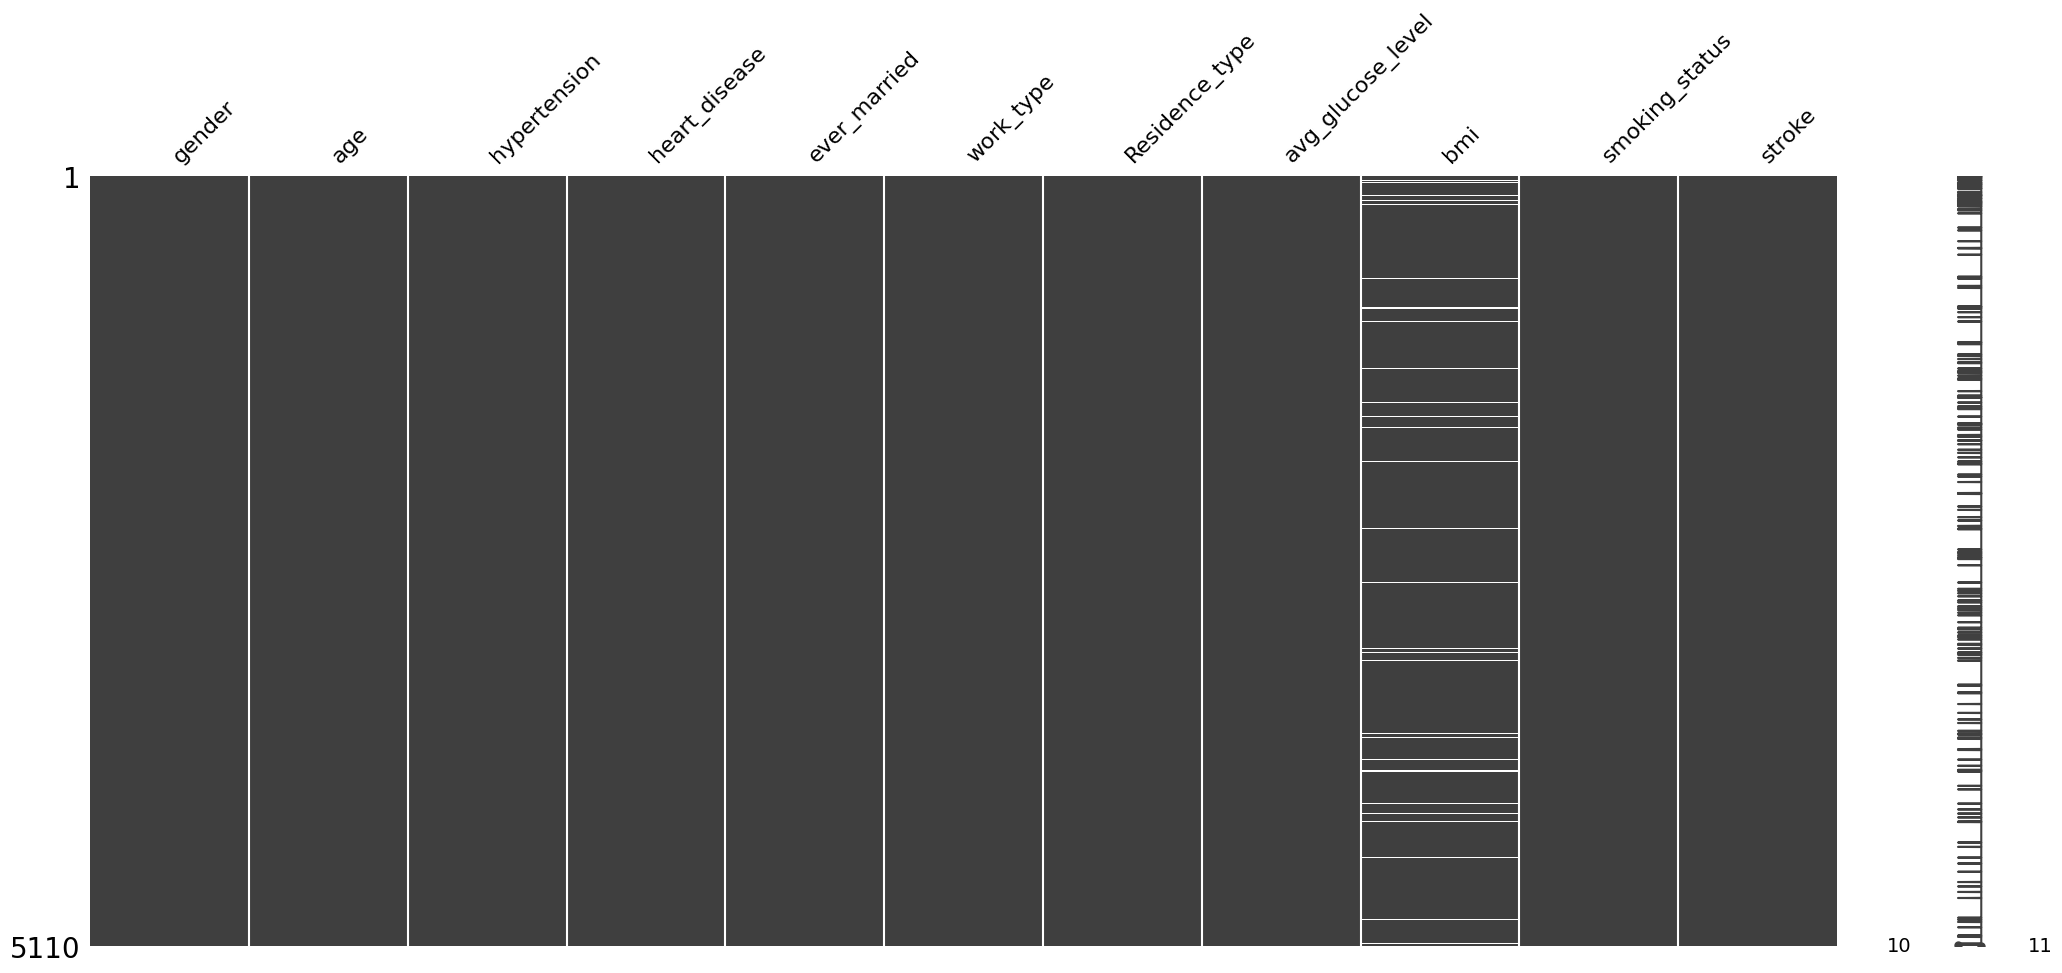

In [13]:
#will use different approach to know the missing values for this dataset:

#first, import the library:
import missingno as msno

#second, visualise..
# print("Bar Chart Visualization:")
# msno.bar(df)
# plt.show()

print("Matrix Visualization:")
msno.matrix(df)
plt.show()

# print("Heatmap Visualization:")
# msno.heatmap(df)
# plt.show()



In [14]:
# calculating missing values percentage for the "bmi" column:
missing_bmi_percentage = df["bmi"].isnull().mean() *100
print("percentage of missing values for the bmi column = ", missing_bmi_percentage, "%")

percentage of missing values for the bmi column =  3.9334637964774952 %


In [15]:
#since the Null values are less than 5%, I will be dropping rows with null values
df = df.dropna()

In [16]:
df.isnull().sum()*100

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
#there are no duplicates but if there were duplicates, I would have used the following code:
#df.drop_duplicates(["column_name?"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [20]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
df['gender'].value_counts(normalize= True)

gender
Female    0.590141
Male      0.409656
Other     0.000204
Name: proportion, dtype: float64

In [22]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [24]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [25]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [26]:
sum_unknown_smoking_values = (df['smoking_status'] == 'unknown').sum()
sum_unknown_smoking_values

0

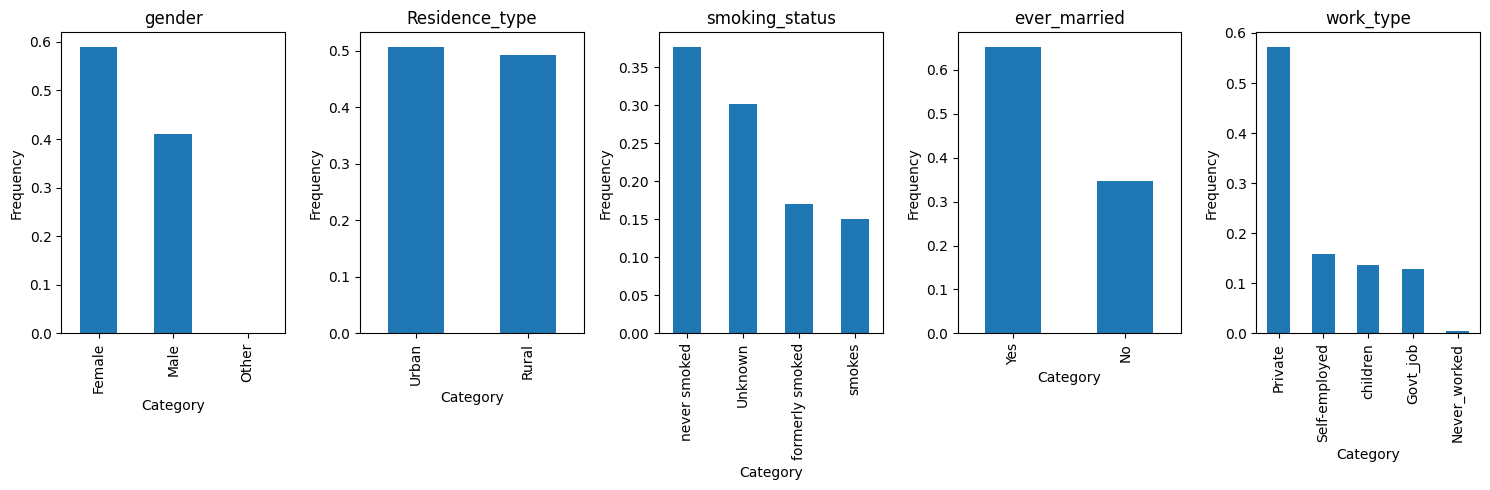

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Specify the columns you want to include in the matrix
columns_to_plot = ['gender', 'Residence_type', 'smoking_status', 'ever_married', 'work_type']

# Define the number of rows and columns for the matrix based on the number of columns to plot
num_rows = 1  # Since we have only one row of charts
num_cols = len(columns_to_plot)

# Create a figure and axes for the matrix of bar charts
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flatten the axes array to iterate over them
axs = axs.flatten()

# Loop through each specified column and plot a bar chart on the corresponding axis
for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    counts = df[col].value_counts(normalize=True)  # Calculate relative frequencies
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)  # Set the title of the chart to the column name
    ax.set_xlabel('Category')
    ax.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [28]:
sum_other_values = (df['gender'] == 'Other').sum()
print("Sum of 'other' values in the gender column:", sum_other_values)


Sum of 'other' values in the gender column: 1


In [29]:
#will drop this other to have accurate results for my model
df = df[df['gender'] != 'Other']
sum_other_values = (df['gender'] == 'Other').sum()
sum_other_values

0

Tranformation

In [30]:
df['Residence_type'] = df['Residence_type'].replace(['Rural', 'Urban'], [0, 1])

In [31]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

Better approach for transformation:

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
df['work_type'] = le.fit_transform(df['work_type'])

In [35]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [36]:
df['ever_married'] = le.fit_transform(df['ever_married'])

 Panda's get dummies

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.1 KB


data exploration to get insight into the relationships existing in our data, also do some bivariate univariate analysis. Do some hypothesis testing.. including data visualisations

In [38]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [39]:
df['gender'].unique()

array([1, 0])

In [40]:
df['gender_cat'] = df['gender'].replace([1, 0], ['Female', 'Male'])

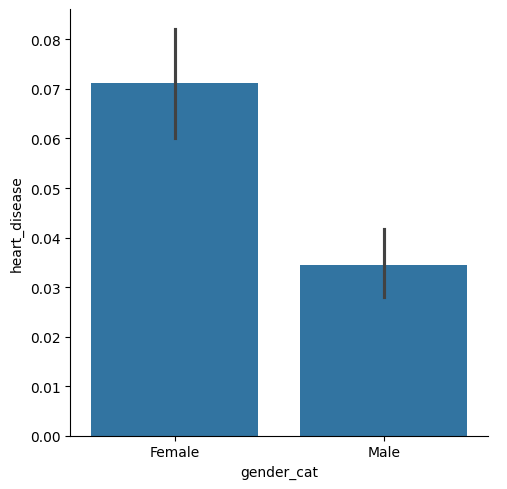

In [41]:
sns.catplot(data = df, y= 'heart_disease', x= 'gender_cat', kind ='bar')

<Axes: xlabel='age', ylabel='bmi'>

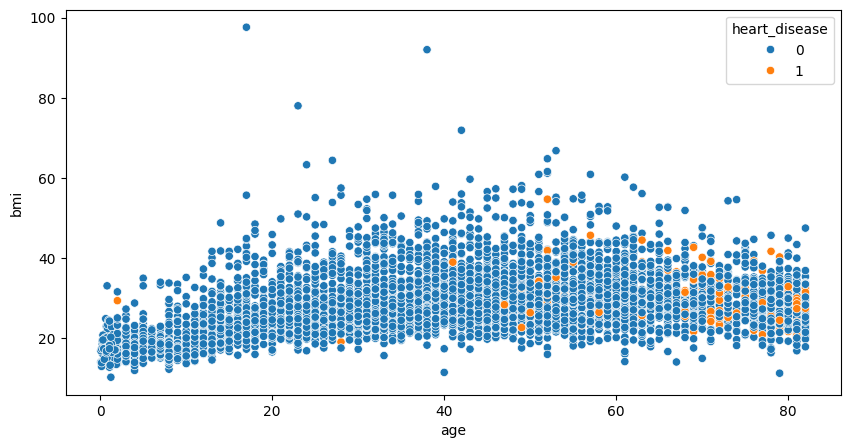

In [42]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x= 'age', y='bmi', hue = 'heart_disease')

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

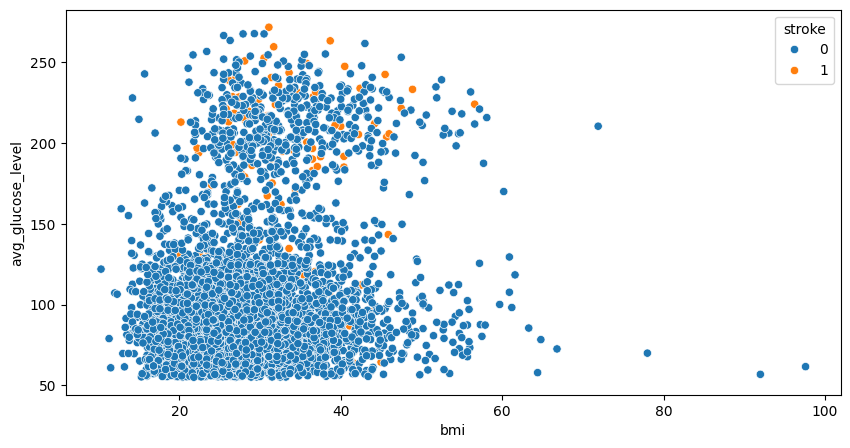

In [43]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x= 'bmi', y='avg_glucose_level', hue = 'stroke')

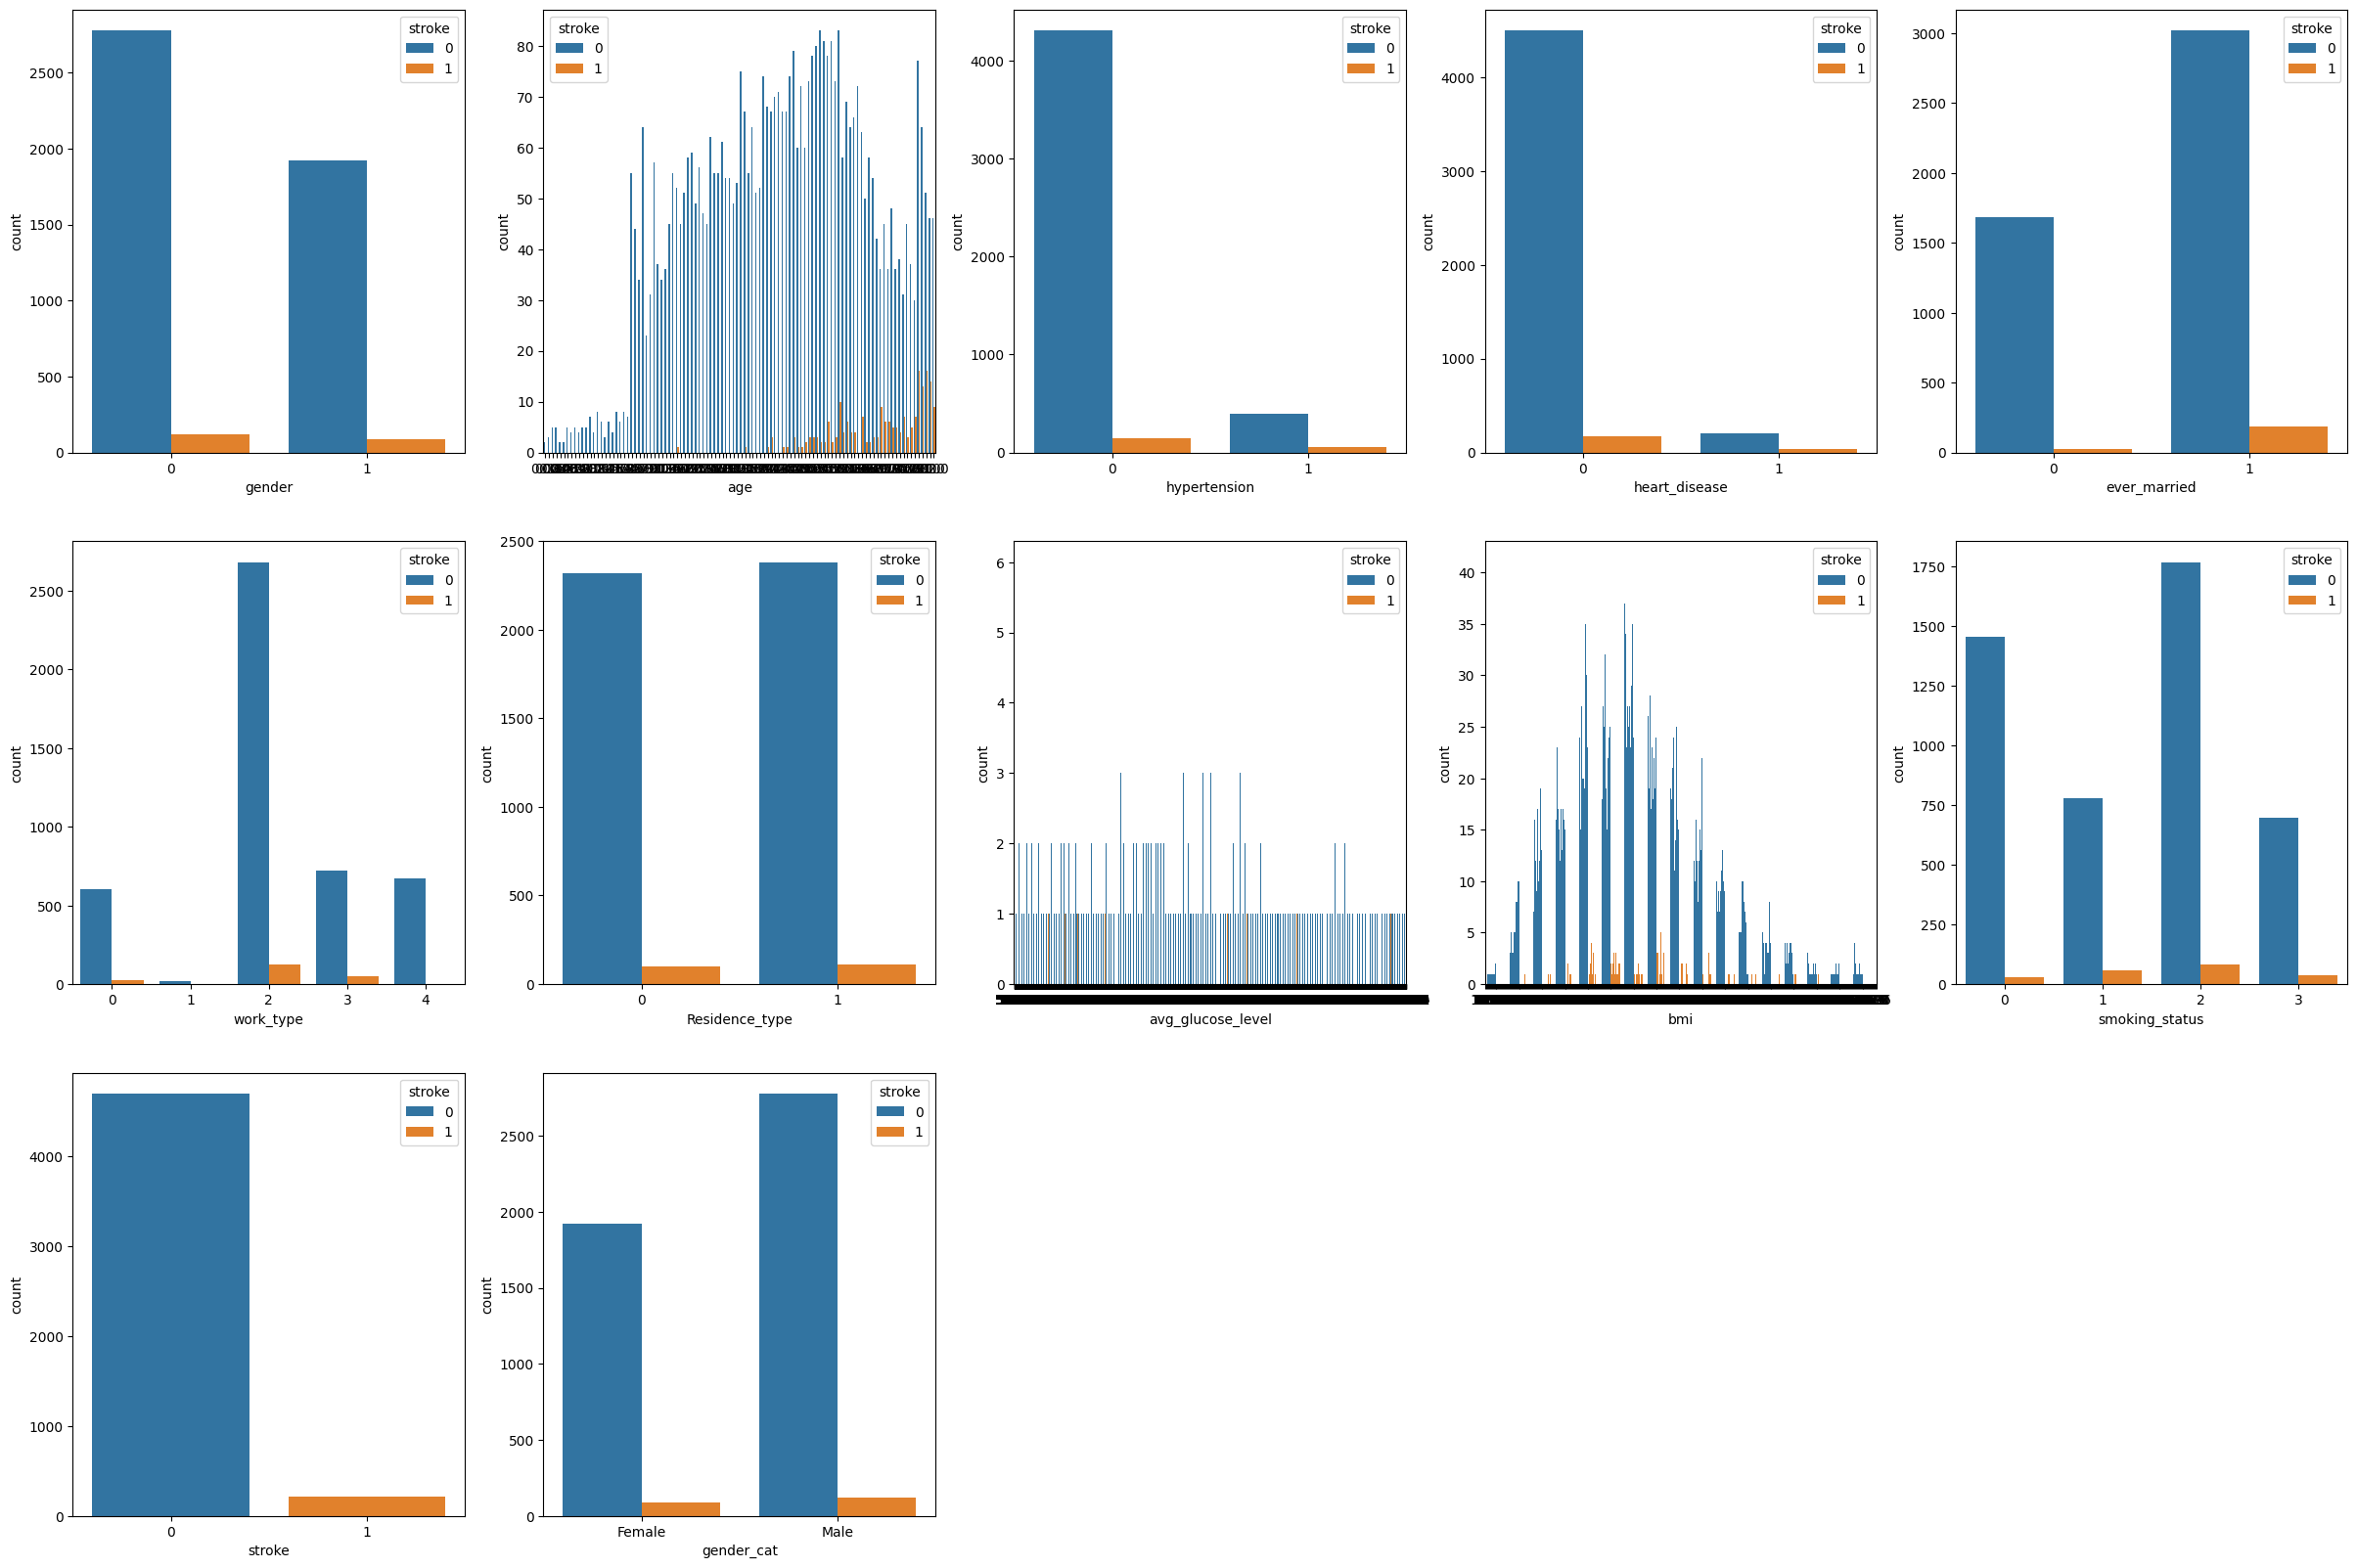

In [44]:
plt.figure(figsize = (30, 20))
for i in enumerate(df.columns):
  plt.subplot(3, 5, i[0]+1)
  sns.countplot(x=i[1], hue = 'stroke', data = df)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
 11  gender_cat         4908 non-null   object 
dtypes: float64(3), int64(8), object(1)
memory usage: 498.5+ KB


In [46]:
df.drop(columns = ['gender_cat'], inplace = True)

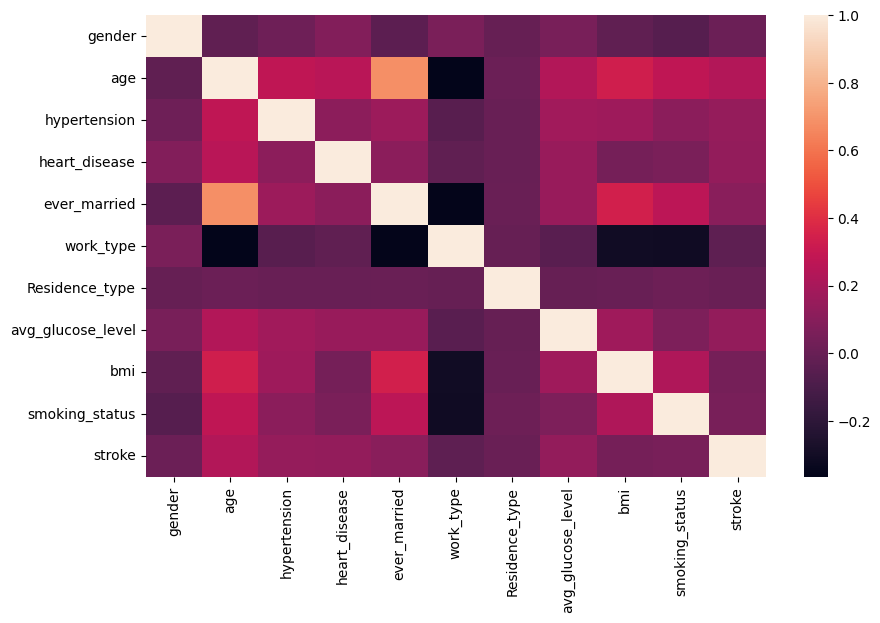

In [47]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr())
plt.show()

In [48]:
#seperate boxplots for all variables:

# g = sns.FacetGrid(df, row = 'gender', col = 'age')
# g.map(sns.histplot, 'stroke')
# plt.show()


# I could do this if I have the age in categories

<Axes: xlabel='smoking_status', ylabel='avg_glucose_level'>

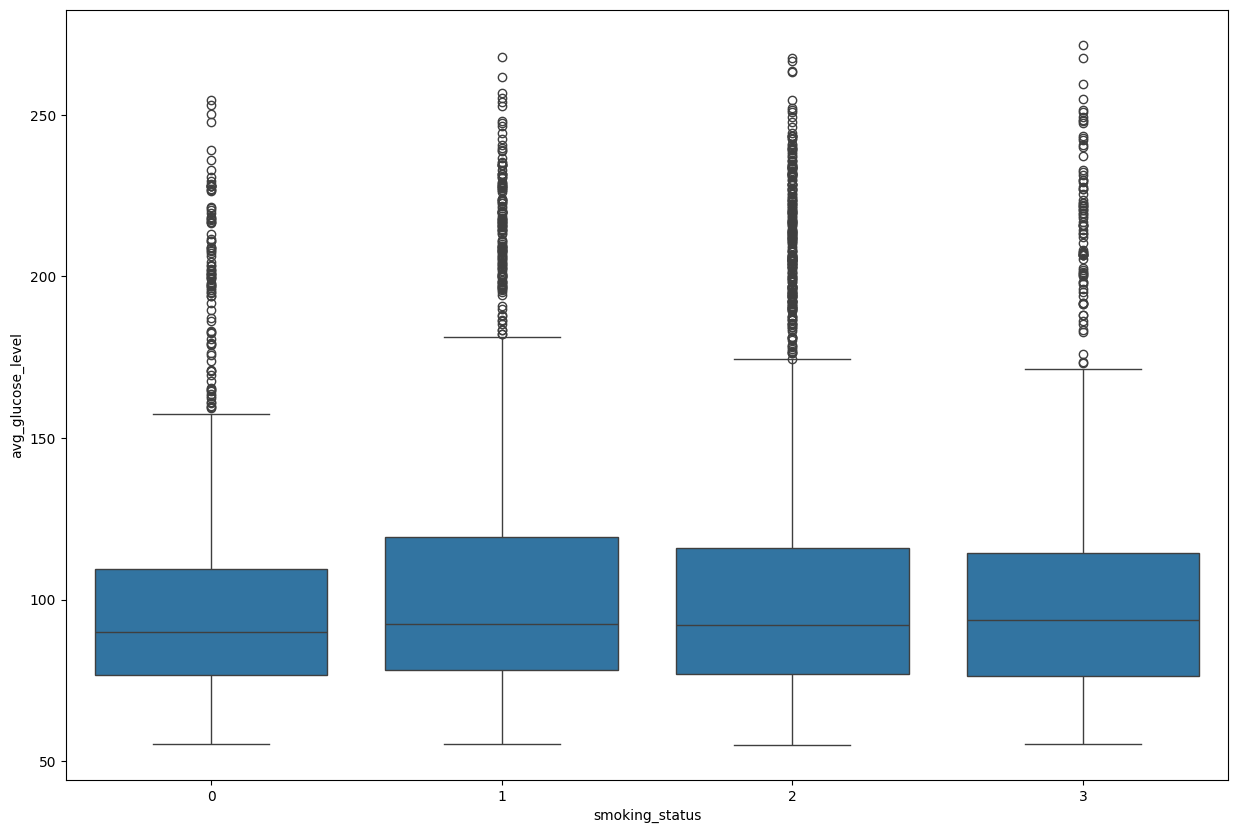

In [49]:
fig, ax =plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, x = 'smoking_status', y ='avg_glucose_level', ax=ax)

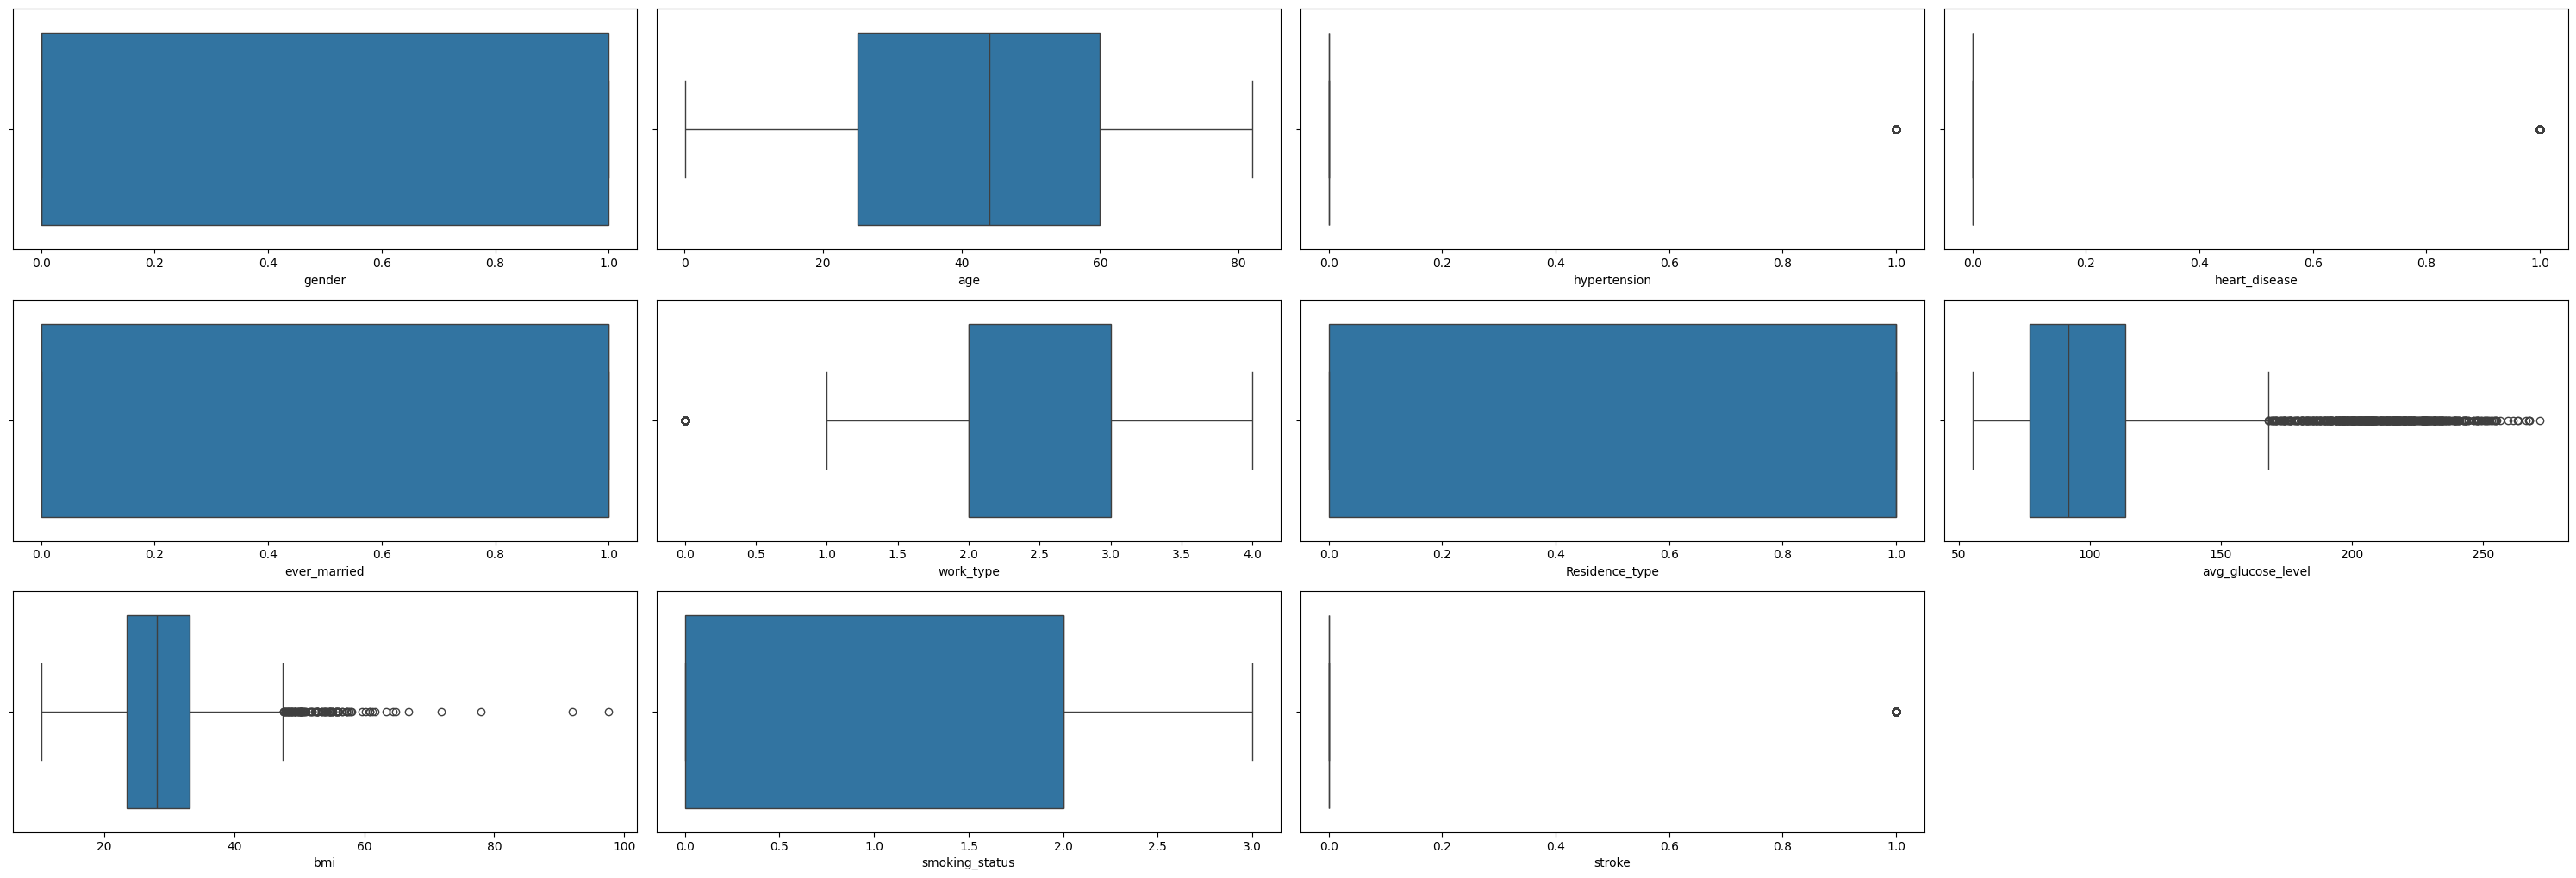

In [50]:
plt.figure(figsize =(30, 20))
for i in enumerate(df.columns):
  plt.subplot(6, 4, i[0]+1)
  sns.boxplot(x = i[1], data = df)
plt.tight_layout()

## *Behold, ...now we build the machine learning model*

In [51]:
#distribution in target variable
df['stroke'].value_counts(normalize = True)

stroke
0    0.957416
1    0.042584
Name: proportion, dtype: float64

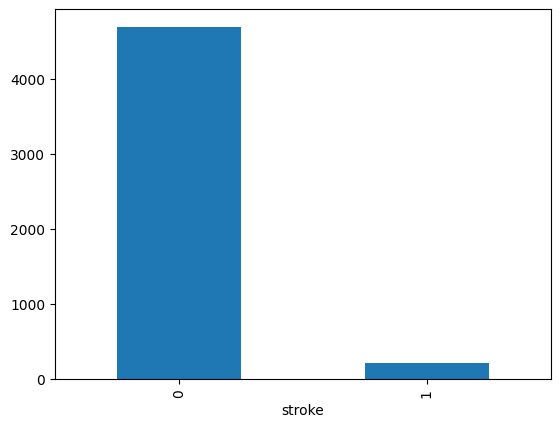

In [52]:
#visualize the distribution in target variable - bar chart
df['stroke'].value_counts().plot(kind = 'bar')
plt.show()

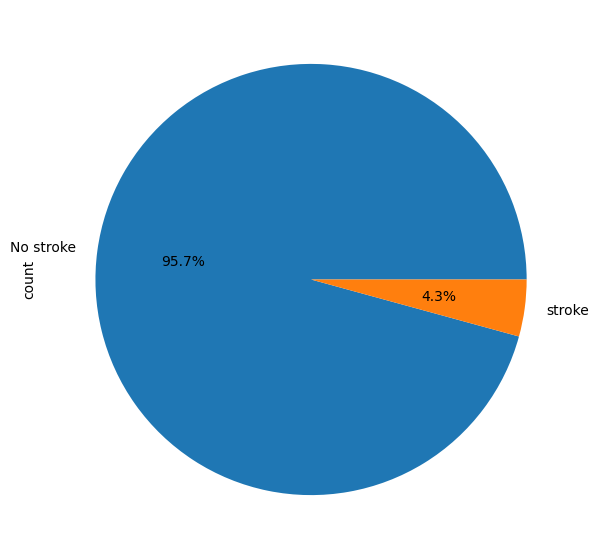

In [53]:
#visualize the distribution in target variable - piechart
plt.figure(figsize = (10, 7))
df['stroke'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['No stroke', 'stroke'])
plt.show()

# splitting x and y

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.1 KB


In [55]:
#Creating a new df with the 'stroke' column excluded because it is my Y variable
columns_to_exclude = ['stroke']
new_df = df.drop(columns=columns_to_exclude)

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 421.8 KB


In [57]:
x = new_df
print("X's shape: ", x.shape)

y = df['stroke']
print("Y's shape: ", y.shape)

X's shape:  (4908, 10)
Y's shape:  (4908,)


 **Synthetic Minority Oversampling (SMOTE)**.. since the we need to oversample the minority

In [58]:
# !pip install imbalanced-learn

In [59]:
#load the algrithm: SMOTE module
from imblearn.over_sampling import SMOTE

In [60]:
#Create test and train, also SMOTE the x matrices
os = SMOTE(random_state = 42)
x_os, y_os = os.fit_resample(x, y) #we assigned them to our new x and y matrices

In [61]:
#matrices dimensions:
x_os.shape, y_os.shape #os as in Over Sampling

((9398, 10), (9398,))

In [62]:
y_os.value_counts()

stroke
1    4699
0    4699
Name: count, dtype: int64

new ratio 1:1 after oversampling


In [63]:
#put the x_os and y_os together so that we can do univariate and bivariate analysis
df_os = pd.DataFrame(x_os)
df_os['stroke'] = y_os

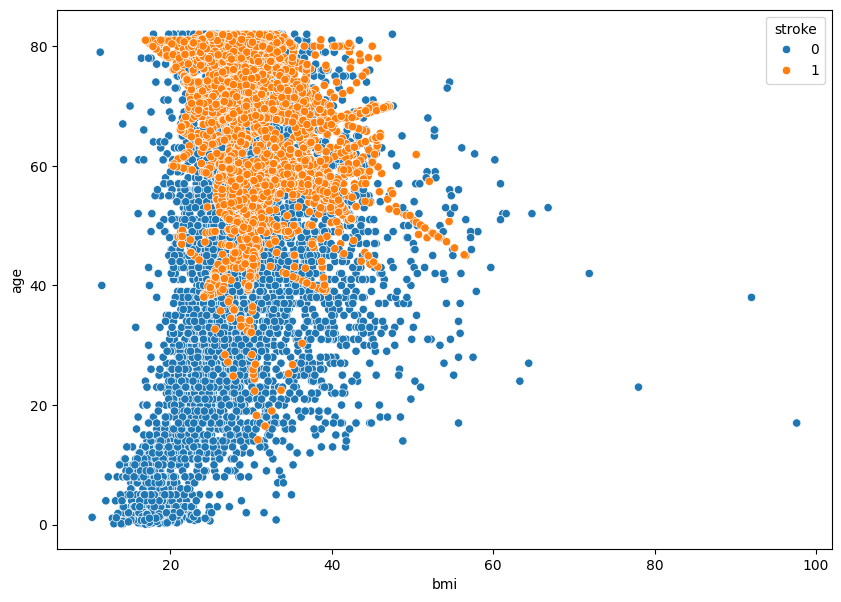

In [64]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df_os, x = 'bmi', y = 'age', hue = 'stroke')
plt.show()

# **2nd splitting:** *train and test data*

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size = 0.3, random_state = 42)

Scaling values

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
  #scaling train features for optimal model performance
  sc_train = StandardScaler().fit(x_train)
  x_train_sc = sc_train.transform(x_train)

In [69]:
#snapshot of the transformed data
np.set_printoptions(precision = 3)
print(x_train_sc[0: 5, :])

[[-0.693 -2.011 -0.305 -0.225 -1.606  2.071  1.238 -1.04  -1.504 -1.4  ]
 [-0.693 -1.205 -0.305 -0.225 -1.606  0.039 -0.808 -0.545  0.473 -0.338]
 [-0.693 -0.265  3.278 -0.225  0.622 -1.993 -0.808 -0.214 -0.646 -1.4  ]
 [-0.693  1.007 -0.305 -0.225  0.622  0.039 -0.808  0.096  0.003 -0.338]
 [ 1.442 -0.265  3.278 -0.225  0.622  1.055 -0.808 -0.492  0.531 -0.338]]


# Training the model

Logistic regression model, since the output is categorical

In [70]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression and fit it to your data
model_lr = LogisticRegression(solver='liblinear')

model_lr.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

Testing the model

In [71]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [72]:
#test performance of the model on the test data

results = model_lr.score(x_test_sc, y_test)
results*100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


50.10638297872341

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and fit the model
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(x_train, y_train)

# Make predictions
y_pred = model_lr.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1407
           1       0.80      0.81      0.80      1413

    accuracy                           0.80      2820
   macro avg       0.80      0.80      0.80      2820
weighted avg       0.80      0.80      0.80      2820

[[1121  286]
 [ 269 1144]]


Graphical representation of correlation of variables with target

<Axes: title={'center': 'Correlation with "stroke"'}>

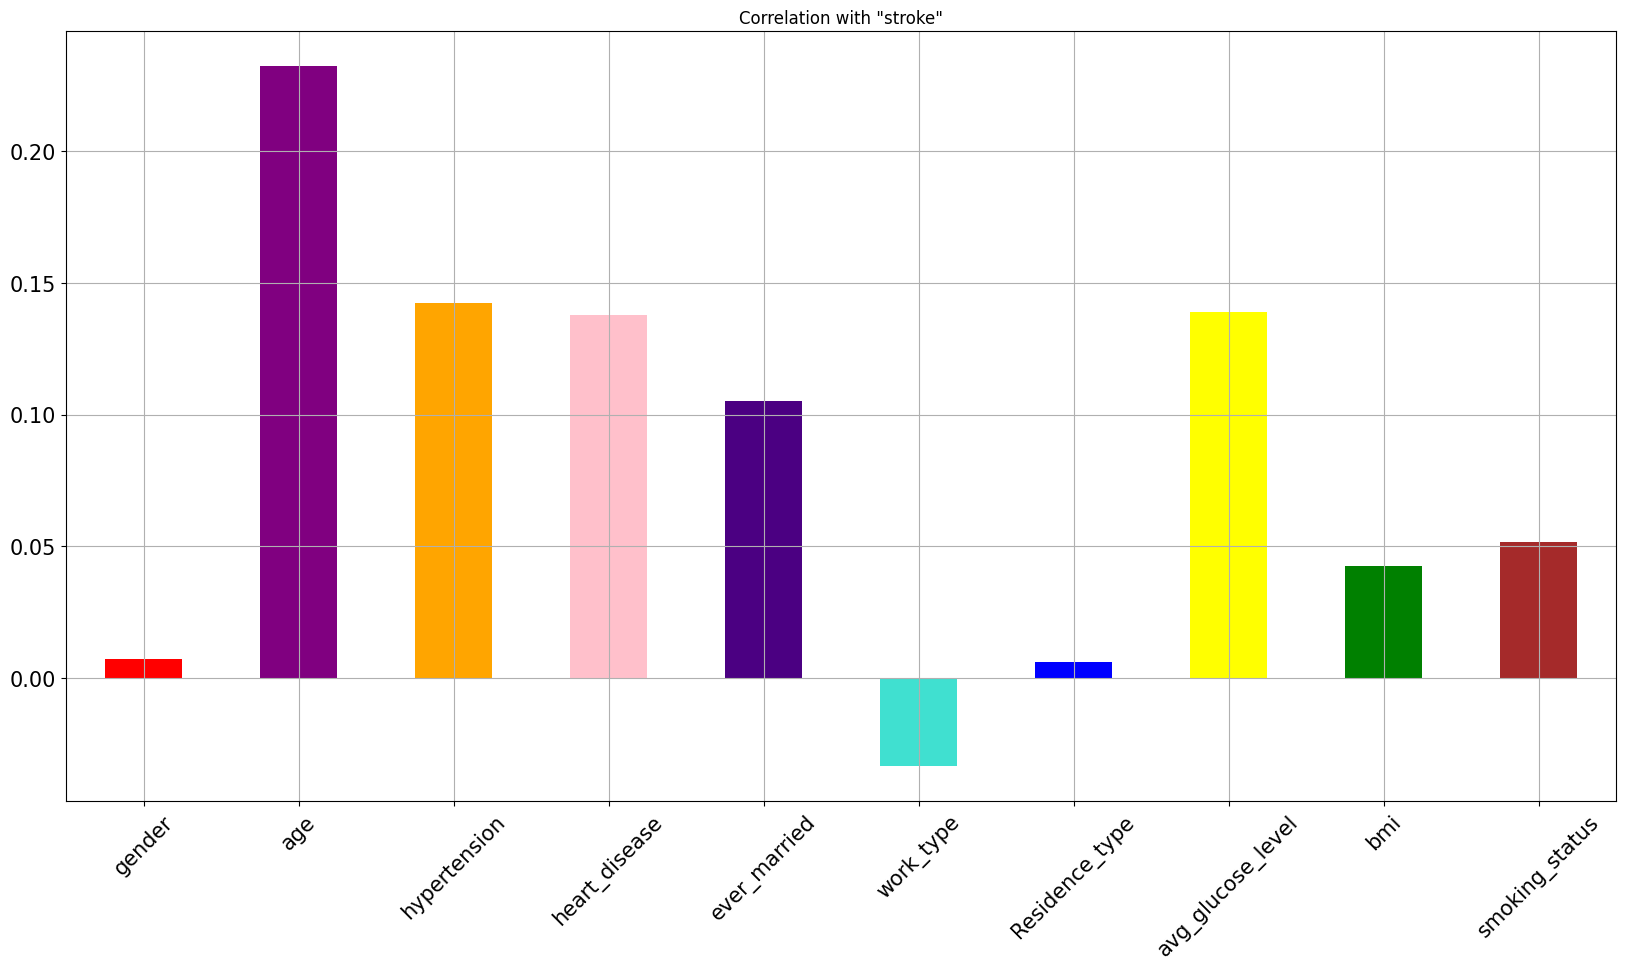

In [74]:
c = ['red', 'purple', 'orange', 'pink', 'Indigo', 'turquoise',  'blue', 'yellow', 'green', 'brown']
new_df.corrwith(df['stroke']).plot.bar(figsize = (20, 10),
                                       title = 'Correlation with "stroke"',
                                       fontsize = 15, rot =45, grid = True, color = c)

In [75]:
lr_1 = LogisticRegression(solver = 'liblinear')

In [76]:
  #scaling train features for optimal model performance
  sc_train = StandardScaler().fit(x_train)
  x_train_sc = sc_train.transform(x_train)

In [77]:
x_train_sc

array([[-0.693, -2.011, -0.305, ..., -1.04 , -1.504, -1.4  ],
       [-0.693, -1.205, -0.305, ..., -0.545,  0.473, -0.338],
       [-0.693, -0.265,  3.278, ..., -0.214, -0.646, -1.4  ],
       ...,
       [-0.693, -0.318, -0.305, ..., -0.769,  0.121,  0.724],
       [ 1.442,  0.361, -0.305, ..., -1.102, -0.094, -0.338],
       [-0.693,  1.071, -0.305, ..., -0.939, -0.884, -0.338]])

In [78]:
model_lr.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [79]:
  sc_train = StandardScaler().fit(x_train)
  x_train_sc = sc_train.transform(x_train)

In [80]:
# Fit the logistic regression model
lr_1.fit(x_train_sc, y_train)

# Calculate the accuracy score on the test data
results = lr_1.score(x_test_sc, y_test)
results_percentage = results * 100

print("Accuracy:", results_percentage)

Accuracy: 80.49645390070921


Cross-validation

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [82]:
#generate instances of the kfold and logistic regression algorithm
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
lr_2 = LogisticRegression(solver = 'liblinear')

In [83]:
#Train the logistic regression model w/ kfold cross validation and get the scores
results = cross_val_score(lr_2, x_train_sc, y_train, cv = kfold)
results

array([0.78 , 0.792, 0.809, 0.812, 0.784, 0.815, 0.796, 0.827, 0.79 ,
       0.784])

In [84]:
results.mean()*100.0, results.std()*100.0

(79.87194255920575, 1.491356948721439)

In [85]:
#logistic regression and cv with 'log_loss' metric
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
lr_3 = LogisticRegression(solver = 'liblinear')
results = cross_val_score(lr_3, x_train_sc, y_train, cv = kfold, scoring = 'neg_log_loss')
results.mean(), results.std()

(-0.41573769115577336, 0.01836568181327836)

In [86]:
#Logistic regression with AUC metric
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
lr_4 = LogisticRegression(solver = 'liblinear')
results = results = cross_val_score(lr_4, x_train_sc, y_train, cv = kfold, scoring = 'roc_auc')
print("AUC:", (results.mean(), results.std()))


AUC: (0.8872294485913127, 0.011531357564939315)


visualisation

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Axes: >

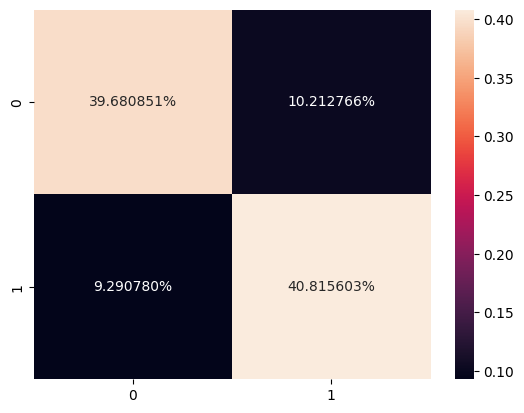

In [88]:
#confusion matrix
pred_y = lr_1.predict(x_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix), fmt = '-2%', annot = True)

In [89]:
#classification report
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1407
           1       0.80      0.81      0.81      1413

    accuracy                           0.80      2820
   macro avg       0.81      0.80      0.80      2820
weighted avg       0.81      0.80      0.80      2820



In [90]:
#list of features
features = list(new_df.columns)
features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [93]:
list_of_coef = lr_1.coef_
list_of_coef

array([[-0.401,  2.036, -0.284, -0.201, -0.427, -0.303, -0.523,  0.42 ,
         0.134, -0.199]])

In [94]:
list_of_coef = list_of_coef.ravel().tolist()
list_of_coef

[-0.40070453137560774,
 2.0356345684018193,
 -0.28380537755143936,
 -0.20074945956661827,
 -0.42726363970022063,
 -0.3034453969719227,
 -0.523149410686775,
 0.4203840805686216,
 0.13364035245281813,
 -0.19879715157453381]

In [96]:
data = {"features": features,
        "coefficients": list_of_coef}

coef_table = pd.DataFrame(data)
coef_table = coef_table.sort_values(by = 'coefficients')
coef_table

,features,coefficients
6,Residence_type,-0.523149
4,ever_married,-0.427264
0,gender,-0.400705
5,work_type,-0.303445
2,hypertension,-0.283805
3,heart_disease,-0.200749
9,smoking_status,-0.198797
8,bmi,0.133640
7,avg_glucose_level,0.420384
1,age,2.035635


In [100]:
features


['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

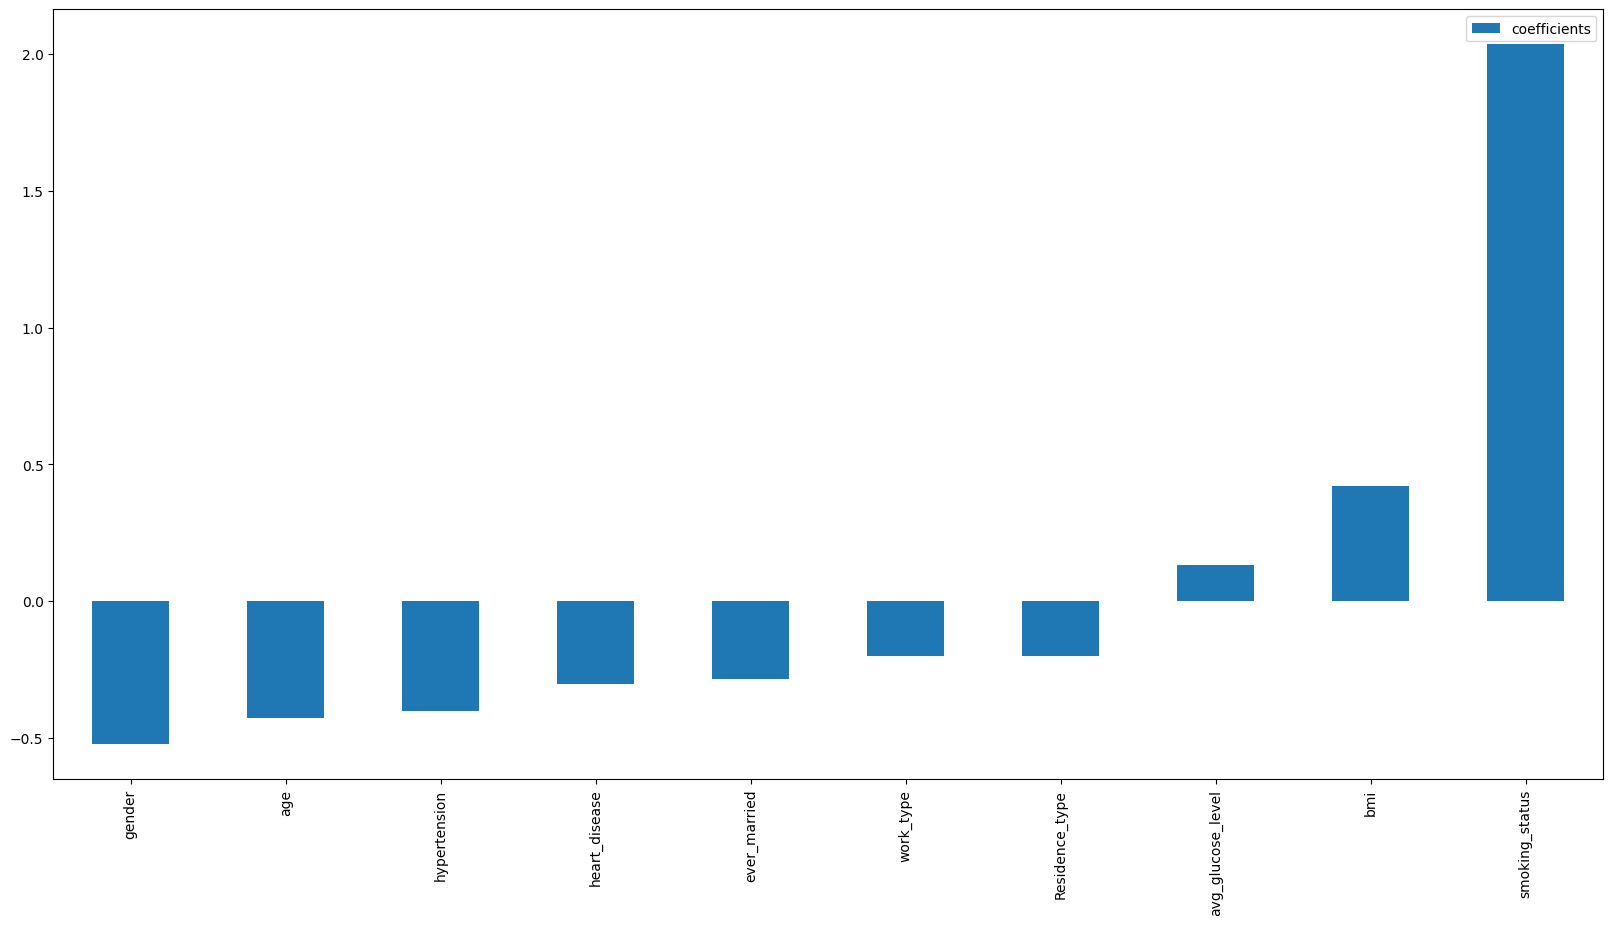

In [101]:
#plot of the variables
coef_table.plot(kind = 'bar', figsize = (20, 10))
plt.xticks(np.arange (0, 10), features)
plt.show()